# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
!pip -q install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 8.4 MB/s eta 0:00:00


In [4]:
import os
import glob
import pandas as pd
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import yaml
from sklearn.model_selection import train_test_split
import shutil

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [6]:
!unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/images/aditganteng_mp4-436_jpg.rf.7ff1071b0d463321df7cf95574f276ab.jpg  
  inflating: train/images/aditganteng_mp4-438_jpg.rf.b8771de8ee61050524ff29fab2a06b1c.jpg  
  inflating: train/images/aditganteng_mp4-440_jpg.rf.7afd33b1c671f45528f9e2c1ccb1b858.jpg  
  inflating: train/images/aditganteng_mp4-441_jpg.rf.4361211c10b5fd6ab35467b7f27e22d5.jpg  
  inflating: train/images/aditganteng_mp4-442_jpg.rf.341ae0a8de425a939f8be98aab892190.jpg  
  inflating: train/images/aditganteng_mp4-443_jpg.rf.c19024088f19a4a9d1a954fc26dd9f42.jpg  
  inflating: train/images/aditganteng_mp4-444_jpg.rf.09941bd678e4f47f4990f97d9c3004fc.jpg  
  inflating: train/images/aditganteng_mp4-445_jpg.rf.f7b1331e4ef56d08f542043be39d56f9.jpg  
  inflating: train/images/aditganteng_mp4-446_jpg.rf.c8091397dc971d2fbf1060b9ab2de717.jpg  
  inflating: train/images/aditganteng_mp4-447_jpg.rf.674f5d7a20f337e56886c62845c51093.jpg  
  inflating: train/images/adi

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [7]:
train_images_path = '/content/train/images'
n_images = len(os.listdir(train_images_path))
print(f'train: {n_images} images')

train: 2634 images


In [8]:
# Cek distribusi kelas (label)
class_counts = {}
label_path = glob.glob('/content/train/labels/*.txt')
for lf in label_path:
  with open(lf, 'r') as f:
    for line in f:
      cls = int(line.split()[0])
      class_counts[cls] = class_counts.get(cls, 0) + 1
df = pd.DataFrame(list(class_counts.items()), columns=['Class ID', 'Count']).sort_values('Count', ascending=False).reset_index(drop=True)
print(df)

    Class ID  Count
0          4  19083
1          7   3294
2          9   2760
3          1   1822
4          8   1701
5         10   1111
6         11    641
7          0    433
8          2    390
9          5    359
10         6    191
11         3    120


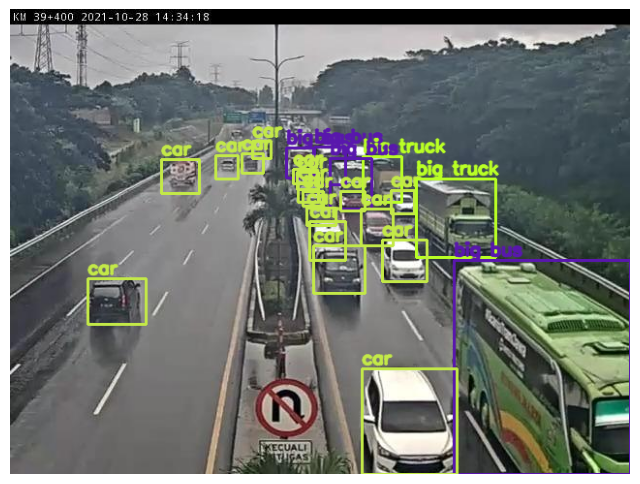

In [11]:
# Baca daftar kelas dari data.yaml
with open('/content/data.yaml') as f:
    data_yaml = yaml.safe_load(f)
classes = data_yaml['names']

# Buat warna acak untuk tiap kelas
colors = {i: [random.randint(0,255) for _ in range(3)] for i in range(len(classes))}

def plot_bbox_colored(image_path, label_path):
    img = cv2.imread(image_path)
    h, w, _ = img.shape

    with open(label_path) as f:
        for line in f:
            c, x, y, bw, bh = map(float, line.split())
            c = int(c)
            x1 = int((x - bw/2) * w)
            y1 = int((y - bh/2) * h)
            x2 = int((x + bw/2) * w)
            y2 = int((y + bh/2) * h)

            color = colors[c]
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

            # Tambahkan nama kelas di atas kotak
            label = f"{classes[c]}"
            cv2.putText(img, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                        0.6, color, 2, lineType=cv2.LINE_AA)

    plt.figure(figsize=(8,8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Contoh panggilan
plot_bbox_colored(
   '/content/train/images/adit_mp4-102_jpg.rf.abbf78b94f893b8d0e1c33949744b308.jpg',
   '/content/train/labels/adit_mp4-102_jpg.rf.abbf78b94f893b8d0e1c33949744b308.txt'
)


In [12]:
sizes = []
for img_name in os.listdir(train_images_path):
    img = Image.open(f'{train_images_path}/{img_name}')
    sizes.append(img.size)

widths, heights = zip(*sizes)
print(f'Rata-rata ukuran gambar: {np.mean(widths):.0f}x{np.mean(heights):.0f}')


Rata-rata ukuran gambar: 640x480


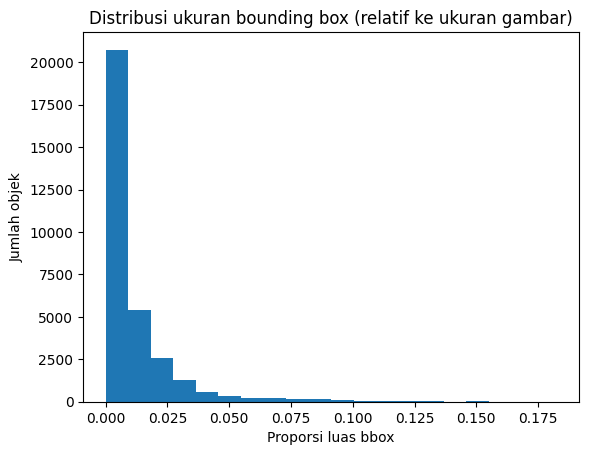

In [13]:
bbox_sizes = []
for lf in label_path:
    with open(lf) as f:
        for line in f:
            _, _, _, bw, bh = map(float, line.split())
            bbox_sizes.append(bw * bh)

plt.hist(bbox_sizes, bins=20)
plt.title('Distribusi ukuran bounding box (relatif ke ukuran gambar)')
plt.xlabel('Proporsi luas bbox')
plt.ylabel('Jumlah objek')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
images = set(os.path.splitext(f)[0] for f in os.listdir('/content/train/images'))
labels = set(os.path.splitext(f)[0] for f in os.listdir('/content/train/labels'))

unlabeled_images = images - labels
missing_images = labels - images

print("Gambar tanpa label:", unlabeled_images)
print("Label tanpa gambar:", missing_images)


Gambar tanpa label: set()
Label tanpa gambar: set()


In [15]:
images = list(images)
train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)
val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.33, random_state=42)

def move_files(file_list, src_img, src_lbl, dst_img, dst_lbl):
    os.makedirs(dst_img, exist_ok=True)
    os.makedirs(dst_lbl, exist_ok=True)
    for f in file_list:
        shutil.copy(f"{src_img}/{f}.jpg", f"{dst_img}/{f}.jpg")
        shutil.copy(f"{src_lbl}/{f}.txt", f"{dst_lbl}/{f}.txt")

move_files(train_imgs, '/content/train/images', '/content/train/labels', '/content/new_train/images', '/content/new_train/labels')
move_files(val_imgs, '/content/train/images', '/content/train/labels', '/content/new_val/images', '/content/new_val/labels')
move_files(test_imgs, '/content/train/images', '/content/train/labels', '/content/new_test/images', '/content/new_test/labels')
